In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression


In [15]:
#for c in range(1,len(db.columns)):
    #db[db.columns[c]] = db[db.columns[c]].astype('category')



def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results


def dummify(data, column_name):
    """
        Converts the column column_name in dummies / one-hot, adds them to the df and returns the df without
        original undummified columns
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

def dummify2(data, column_name):
    return pd.get_dummies(data[column_name], prefix=column_name)
    

In [16]:
db = pd.read_excel('new_vdem.xlsx')
db.set_index("Country")

,VDEM,1,3,5,7,9,11,13,13.01 - Legal entities,13.02 -Other,...,57.4,57.5,57.6,57.7,57.8,58,59,60,62,63
Country,,,,,,,,,,,,,,,,,,,,,
Angola,0.386,#Yes,#No,#No,#No,#No,#Yes,#Legal entities\n#Other,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,#EMB,#No data,#No data,#Court,#Fines\n#Other\n#Suspension of public funding
Argentina,0.812,#Yes,#Yes,#Yes,#Yes,#Yes,#Yes,#Organisations connected to gambling\n#Organis...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#Federal Justice with electoral jurisdiction,#Impose fines,#Not applicable,#Body of Auditors,#Fines #Loss of public funding #Loss of politi...
Australia,0.838,#Yes,#No,#No,"#No, but specific limit",#No,#No,#No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#EMB,#Refer for investigation\n#Carry out investiga...,#Not applicable,#Other,#Fines\n#Prison
Belgium,0.882,#No,#Yes,#Yes,"#No, but specific limit",#Yes,#Yes,#Legal entities,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,#Ministry\n#Parliamentary unit,#Impose sanctions,#Not applicable,#Court,#Fines\n#Loss of public funding
Brazil,0.674,#Yes,#Yes,#Yes,#Yes,#Yes,#Yes,#Religious organisations\n#Charities\n#Other,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,#EMB,#Carry out investigation\n#Request additional ...,#Refer for investigation\n#Carry out investiga...,#Court\n#Other,#Fines\n#Loss of public funding\n#Deregistrati...
Canada,0.866,#Yes,#Yes,#Yes,#Yes,#Yes,#Yes,#Other,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,#EMB,#Carry out investigation\n#Request additional ...,#Not applicable,#None,#Fines\n#Prison\n#Forfeiture\n#Deregistration ...
Chile,0.773,#Yes,#Yes,#Yes,"#No, but specific limit",#Yes,#Yes,#Legal entities\n#Religious organisations\n#Or...,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,#EMB,#Refer for investigation\n#Carry out investiga...,#Carry out investigation\n#Request additional ...,#Auditing agency,#Fines\n#Prison\n#Deregistration of party\n#Su...
Colombia,0.667,#Yes,#No,#No,#Yes,#Yes,#Yes,#Organisations connected to gambling\n#Other,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,#EMB,#Refer for investigation\n#Carry out investiga...,#Refer for investigation\n#Carry out investiga...,#Court,#Fines\n#Prison\n#Forfeiture\n#Loss of public ...
Czech Republic,0.796,#Yes,#No,#No,#Yes,#No,#Yes,#Other,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,#Special institution,#Request additional information from potential...,#No data,#Ministry,#Fines\n#Loss of public funding


In [17]:
db.columns

Index([               'Country',                   'VDEM',
                              1,                        3,
                              5,                        7,
                              9,                       11,
                             13, '13.01 - Legal entities',
       ...
                         '57.4',                   '57.5',
                         '57.6',                   '57.7',
                         '57.8',                       58,
                             59,                       60,
                             62,                       63],
      dtype='object', length=135)

In [18]:
df = db[['VDEM',         1,         3,         5,         7,
               9,        11,        13,        16,        18,        23,
              25,        26,        39,         2,         4,         6,
               8,        10,        12,        20,        22,        24,
              27,    '13.1',        30,        31,        33,        37,
              38,        14,        15,        34,        35,        36,
              40,        41,        43,        45,        46,        47,
              48,        28,        29,        49,        50,        51,
              52,        53,        54,        55,        56,        57,
              58,        59,        60,        62,        63]]

KeyError: "['13.1'] not in index"

In [19]:
Y = df['VDEM']
X = df[[       1,         3,         5,         7,
               9,        11,        13,        16,        18,        23,
              25,        26,        39,         2,         4,         6,
               8,        10,        12,        20,        22,        24,
              27,    '13.1',        30,        31,        33,        37,
              38,        14,        15,        34,        35,        36,
              40,        41,        43,        45,        46,        47,
              48,        28,        29,        49,        50,        51,
              52,        53,        54,        55,        56,        57,
              58,        59,        60,        62,        63]]

KeyError: '[62] not in index'

In [20]:
dici = {}
rsquared = []
questions = []
questionsCoefficients = []
for c in X.columns:
    coefficients =[]
    dvar = dummify2(X, c)
    X = dummify(X, c)
    clf = regress(dvar,Y)
    #print(clf.summary())
    rsquared.append(clf.rsquared)
    questions.append(c)
    questionsCoefficients.append(dict(clf.params))

dici['Rsquared'] = rsquared
dici['Questions'] = questions
dici['Coefficients'] = questionsCoefficients
frame = pd.DataFrame.from_dict(dici)
#frame = frame.sort_values(by='Coefficients', ascending=False)
#print(frame)
#frame = frame.head(11)
#X = df[list(frame["Questions"])]
#for c in X.columns:
   # X = dummify(X, c)
junto = {}
dici2 = {}
for e in dici['Coefficients']:
    junto.update(e)
questions = []
questionsCoefficients = []
for e in junto:
    questionsCoefficients.append(junto[e])
    questions.append(e)
dici2['Questions'] = questions
dici2['Coefficient'] = questionsCoefficients

frame2 = pd.DataFrame.from_dict(dici2)
frame2 = frame2.sort_values(by='Coefficient', ascending=False)

frame2.head(20)

    1_1  1_2
0     0    1
1     0    1
2     0    1
3     1    0
4     0    1
5     0    1
6     0    1
7     0    1
8     0    1
9     1    0
10    0    1
11    0    1
12    1    0
13    1    0
14    0    1
15    0    1
16    0    1
17    0    1
18    0    1
19    0    1
20    1    0
21    0    1
22    0    1
23    1    0
24    0    1
25    0    1
26    0    1
27    0    1
28    0    1
29    0    1
30    0    1
31    0    1
32    1    0
33    0    1
34    0    1
35    0    1
36    0    1
    3_1.0  3_1.5277777777777777  3_2.0
0       1                     0      0
1       0                     0      1
2       1                     0      0
3       0                     0      1
4       0                     0      1
5       0                     0      1
6       0                     0      1
7       1                     0      0
8       1                     0      0
9       1                     0      0
10      1                     0      0
11      0                     0      1

    23_1.0  23_1.5294117647058822  23_2.0
0        1                      0       0
1        0                      0       1
2        1                      0       0
3        0                      1       0
4        1                      0       0
5        0                      0       1
6        0                      0       1
7        0                      0       1
8        0                      0       1
9        1                      0       0
10       1                      0       0
11       0                      0       1
12       1                      0       0
13       0                      0       1
14       0                      0       1
15       0                      0       1
16       0                      0       1
17       0                      0       1
18       0                      1       0
19       0                      0       1
20       1                      0       0
21       0                      0       1
22       1                      0 

    12_1.0  12_1.6666666666666665  12_2.0
0        0                      0       1
1        1                      0       0
2        1                      0       0
3        0                      0       1
4        0                      0       1
5        0                      0       1
6        0                      0       1
7        0                      0       1
8        0                      0       1
9        1                      0       0
10       0                      0       1
11       0                      0       1
12       1                      0       0
13       0                      1       0
14       0                      0       1
15       0                      0       1
16       0                      0       1
17       0                      0       1
18       0                      0       1
19       0                      0       1
20       1                      0       0
21       0                      0       1
22       1                      0 

    37_1.0  37_1.25  37_1.2847222222222223  37_1.5  37_1.75  37_2.0
0        0        1                      0       0        0       0
1        0        1                      0       0        0       0
2        0        1                      0       0        0       0
3        0        1                      0       0        0       0
4        0        1                      0       0        0       0
5        0        1                      0       0        0       0
6        0        1                      0       0        0       0
7        0        1                      0       0        0       0
8        0        1                      0       0        0       0
9        0        1                      0       0        0       0
10       0        0                      0       1        0       0
11       0        0                      0       0        0       1
12       0        0                      1       0        0       0
13       1        0                      0      

    47_1.0  47_1.1166666666666667  47_1.3333333333333333  \
0        1                      0                      0   
1        0                      0                      0   
2        1                      0                      0   
3        0                      1                      0   
4        1                      0                      0   
5        0                      0                      0   
6        1                      0                      0   
7        0                      1                      0   
8        1                      0                      0   
9        1                      0                      0   
10       1                      0                      0   
11       1                      0                      0   
12       1                      0                      0   
13       0                      1                      0   
14       0                      1                      0   
15       1                      0       

    63_1.0  63_1.0833333333333333  63_1.1333333333333333  63_1.15  \
0        0                      0                      0        0   
1        0                      0                      0        0   
2        0                      0                      1        0   
3        0                      1                      0        0   
4        0                      0                      0        0   
5        0                      0                      0        0   
6        0                      0                      0        0   
7        0                      0                      0        0   
8        0                      1                      0        0   
9        0                      0                      0        0   
10       0                      1                      0        0   
11       0                      0                      0        0   
12       0                      0                      0        0   
13       0                      0 

,Questions,Coefficient
180,57_1,0.900000
213,63_1.3333333333333333,0.879000
163,52_1.5,0.873000
60,20_1.4861111111111112,0.873000
24,16_1.9594594594594594,0.873000
195,60_1.6,0.871200
41,39_1.2,0.870500
178,56_1.8285714285714287,0.870000
68,24_1.457142857142857,0.870000
103,37_2.0,0.869500


In [21]:
results = regress(X,Y)
# Regression with selected features
results.summary()

/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   VDEM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Jul 2020   Prob (F-statistic):                nan
Time:                        01:34:44   Log-Likelihood:                 1257.8
No. Observations:                  37   AIC:                            -2442.
Df Residuals:                       0   BIC:                            -2382.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
1_1                         0.0111        inf          0        nan         nan         nan
1_2                         0.0185        inf          0        nan         nan         nan
3_1.0                       0.0162        inf          0        nan         nan         nan
3_1.5277777777777777        0.0040        inf          0        nan         nan         nan
3_2.0                       0.0095        inf          0        nan         nan         nan
5_1                         0.0148        inf          0        nan         nan         nan
5_2                         0.0148        inf          0        nan         nan         nan
7_1.0                      -0.0265        inf         -0        nan         nan         nan
7_1.5                       0.0327        inf          0        nan         nan         nan
7_2.0                       0.0235        inf          0        nan         nan         nan
9_1.0                       0.0158        inf          0        nan         nan         nan
9_1.8611111111111112        0.0193        inf          0        nan         nan         nan
9_2.0                      -0.0054        inf         -0        nan         nan         nan
11_1.0                      0.0018        inf          0        nan         nan         nan
11_1.7777777777777777       0.0012        inf          0        nan         nan         nan
11_2.0                      0.0267        inf          0        nan         nan         nan
13_1.0                      0.0178        inf          0        nan         nan         nan
13_1.1428571428571428       0.0142        inf          0        nan         nan         nan
13_1.2857142857142856       0.0023        inf          0        nan         nan         nan
13_1.4285714285714286       0.0118        inf          0        nan         nan         nan
13_1.7142857142857144      -0.0127        inf         -0        nan         nan         nan
13_2.0                     -0.0037        inf         -0        nan         nan         nan
16_1.0                     -0.0056        inf         -0        nan         nan         nan
16_1.5                      0.0130        inf          0        nan         nan         nan
16_1.9594594594594594      -0.0012        inf         -0        nan         nan         nan
16_2.0                      0.0235        inf          0        nan         nan         nan
18_1.0                     -0.0007        inf         -0        nan         nan         nan
18_1.5                      0.0226        inf          0        nan         nan         nan
18_2.0                      0.0078        inf          0        nan         nan         nan
23_1.0                      0.0151        inf          0        nan         nan         nan
23_1.5294117647058822       0.0075        inf  

<IPython.core.display.Javascript object>


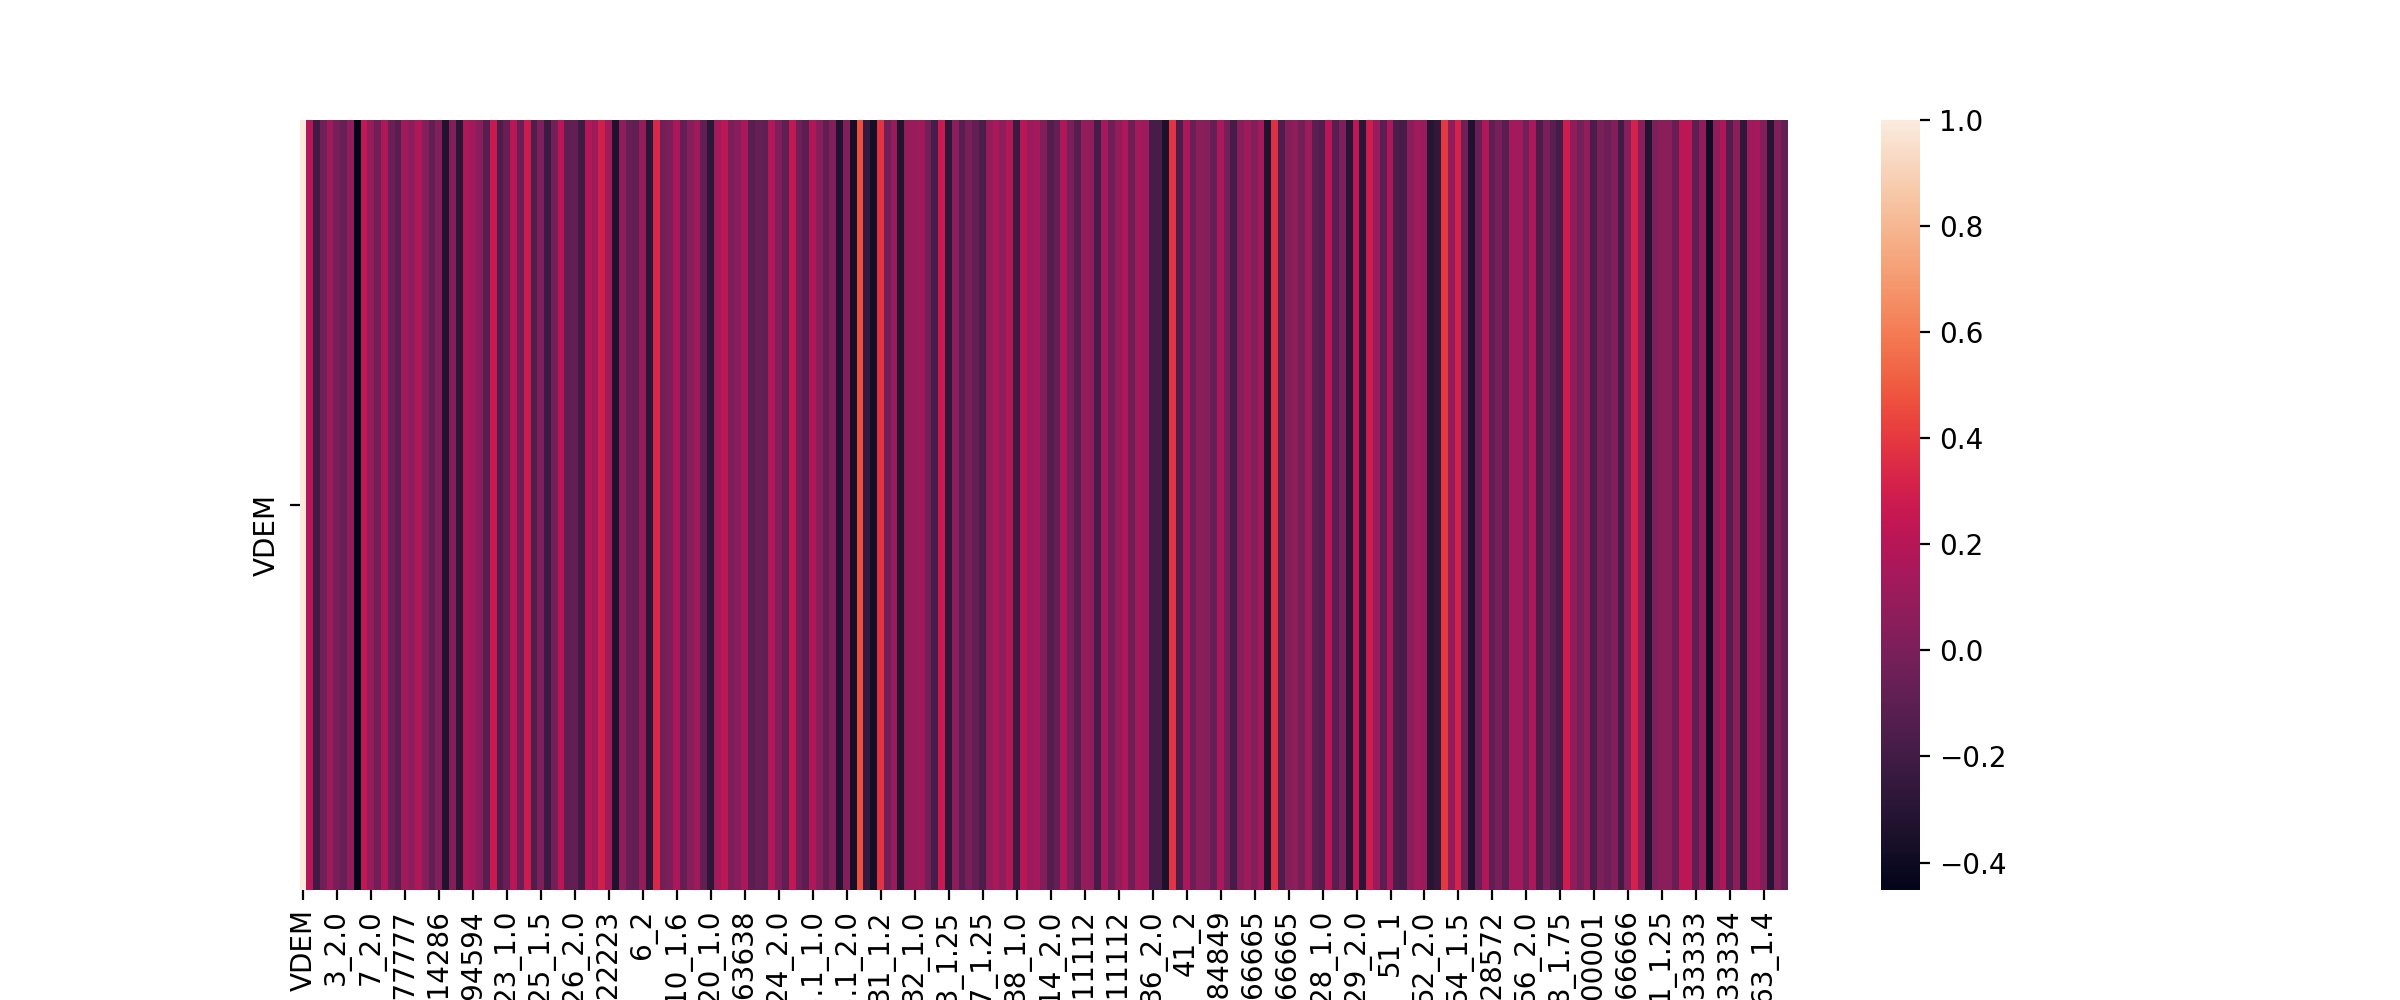

In [28]:
result = pd.merge(Y, X, left_index=True, right_index=True)
result = result.corr()
result = result.head(1)

plt.figure(figsize=(12,5))
sn.heatmap(result, square=False)
plt.show()